In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score



#import minor and major regions
df = pd.concat(
    map(pd.read_csv, ['LCSA2022Summer.csv', 'LCKCL2022Summer.csv', 'LFL2022Summer.csv']), ignore_index=True)
df2 = pd.concat(
    map(pd.read_csv, ['LCS2023Spring.csv', 'LCK2023Spring.csv', 'LEC2023Winter.csv']), ignore_index=True)

#convert % columns to float 
df = df.replace('%','', regex=True)
cols = df.columns.drop(['Player', 'Team', 'Pos'])
df[cols] = df[cols].astype(float)

#remove players with less than 9 games player
df = df[df['GP'] >= 9]
df2 = df2[df2['GP'] >= 9]

#find intersection (players promoted)
int_df = pd.merge(df, df2, how = 'inner', on = ['Player'])

#create list of players promoted
players = int_df['Player'].values.tolist()

#create new column 'Promoted', set to no
df['Promoted'] = 0
#set promoted to yes if in intersection list
df['Promoted'] = np.where(df['Player'].isin(players), 1, 0)
df = df.drop(columns=['Player', 'Team', 'Pos'])

In [2]:
#split testing and training data
y_col = 'Promoted'
x_cols = df.loc[:, df.columns != y_col].columns
training_x, testing_x, training_y, testing_y = train_test_split(df[x_cols], df[y_col], test_size=0.2, random_state = 42)

In [3]:
#model without preprocessing
k = 4
knnMdl = KNeighborsClassifier(n_neighbors=k).fit(training_x, training_y)
knnScores = cross_val_score(knnMdl, training_x, training_y, cv=10, scoring='accuracy')
print("KNN average accuracy on 10-fold cross validation: " + str(np.mean(knnScores)))
knnPredictions = knnMdl.predict(testing_x)
print(knnPredictions)
knn_acc_raw = accuracy_score(testing_y, knnPredictions)
knn_f1_raw = f1_score(testing_y, knnPredictions)
knn_roc_raw = roc_auc_score(testing_y, knnPredictions)
print("KNN accuracy on  test data:", knn_acc_raw)
print("KNN f_measure on  test data:", knn_f1_raw)
print("KNN ROC area on  test data:", knn_roc_raw)


KNN average accuracy on 10-fold cross validation: 0.8076923076923077
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
KNN accuracy on  test data: 0.8529411764705882
KNN f_measure on  test data: 0.0
KNN ROC area on  test data: 0.5


In [4]:
lrMdl = LogisticRegression(solver= 'liblinear').fit(training_x, training_y)
lrScores = cross_val_score(lrMdl, training_x, training_y, cv=10, scoring='accuracy')
print("LR average accuracy on 10-fold cross validation: " + str(np.mean(lrScores)))
lrPredictions = lrMdl.predict(testing_x)
print(lrPredictions)
lr_acc_raw = accuracy_score(testing_y, lrPredictions)
lr_f1_raw = f1_score(testing_y, lrPredictions)
lr_roc_raw = roc_auc_score(testing_y, lrPredictions)
print("LR accuracy on  test data:", lr_acc_raw)
print("LR f_measure on  test data:", lr_f1_raw)
print("LR ROC area on  test data:", lr_roc_raw)


LR average accuracy on 10-fold cross validation: 0.7857142857142857
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
LR accuracy on  test data: 0.8235294117647058
LR f_measure on  test data: 0.25
LR ROC area on  test data: 0.5655172413793104


In [5]:
dtMdl = DecisionTreeClassifier().fit(training_x, training_y)
dtScores = cross_val_score(dtMdl, training_x, training_y, cv=10, scoring='accuracy')
dtPredictions = dtMdl.predict(testing_x)
print("DT average accuracy on 10-fold cross validation: " + str(np.mean(dtScores)))
print(dtPredictions)
dt_acc_raw = accuracy_score(testing_y, dtPredictions)
dt_f1_raw = f1_score(testing_y, dtPredictions)
dt_roc_raw = roc_auc_score(testing_y, dtPredictions)
print("DT accuracy on  test data:", dt_acc_raw)
print("DT f_measure on  test data:", dt_f1_raw)
print("DT Roc area on  test data:", dt_roc_raw)

DT average accuracy on 10-fold cross validation: 0.7428571428571429
[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0]
DT accuracy on  test data: 0.7941176470588235
DT f_measure on  test data: 0.3636363636363636
DT Roc area on  test data: 0.6310344827586205


In [6]:
#perform smote
y_col = 'Promoted'
x_cols = df.loc[:, df.columns != y_col].columns
training_x, testing_x, training_y, testing_y = train_test_split(df[x_cols], df[y_col], test_size=0.2, random_state = 42)
oversample = SMOTE(random_state = 42)
training_x_smote, training_y_smote = oversample.fit_resample(training_x, training_y)

In [7]:
#knn model after Smote
knnMdl = KNeighborsClassifier(n_neighbors=k).fit(training_x_smote, training_y_smote)
knnScores = cross_val_score(knnMdl, training_x_smote, training_y_smote, cv=10, scoring='accuracy')
print("KNN average accuracy on 10-fold cross validation: " + str(np.mean(knnScores)))
knnPredictions = knnMdl.predict(testing_x)
print(knnPredictions)
knn_acc_smote = accuracy_score(testing_y, knnPredictions)
knn_f1_smote = f1_score(testing_y, knnPredictions)
knn_roc_smote = roc_auc_score(testing_y, knnPredictions)
print("KNN accuracy on  test data:", knn_acc_smote)
print("KNN f_measure on  test data:", knn_f1_smote)
print("KNN ROC area on  test data:", knn_roc_smote)

KNN average accuracy on 10-fold cross validation: 0.7948616600790512
[0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0]
KNN accuracy on  test data: 0.7352941176470589
KNN f_measure on  test data: 0.4
KNN ROC area on  test data: 0.6793103448275862


In [8]:
#lr model results after SMOTE
lrMdl = LogisticRegression(solver= 'liblinear').fit(training_x_smote, training_y_smote)
lrScores = cross_val_score(lrMdl, training_x_smote, training_y_smote, cv=10, scoring='accuracy')
print("LR average accuracy on 10-fold cross validation: " + str(np.mean(lrScores)))
lrPredictions = lrMdl.predict(testing_x)
print(lrPredictions)
lr_acc_smote = accuracy_score(testing_y, lrPredictions)
lr_f1_smote = f1_score(testing_y, lrPredictions)
lr_roc_smote = roc_auc_score(testing_y, lrPredictions)
print("LR accuracy on  test data:", lr_acc_smote)
print("LR f_measure on  test data:", lr_f1_smote)
print("LR ROC area on  test data:", lr_roc_smote)

LR average accuracy on 10-fold cross validation: 0.7444664031620554
[0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0]
LR accuracy on  test data: 0.7941176470588235
LR f_measure on  test data: 0.4615384615384615
LR ROC area on  test data: 0.7137931034482758


In [9]:
dtMdl = DecisionTreeClassifier().fit(training_x_smote, training_y_smote)
dtScores = cross_val_score(dtMdl, training_x_smote, training_y_smote, cv=10, scoring='accuracy')
dtPredictions = dtMdl.predict(testing_x)
print("DT average accuracy on 10-fold cross validation: " + str(np.mean(dtScores)))
print(dtPredictions)
dt_acc_smote = accuracy_score(testing_y, dtPredictions)
dt_f1_smote = f1_score(testing_y, dtPredictions)
dt_roc_smote = roc_auc_score(testing_y, dtPredictions)
print("DT accuracy on  test data:", dt_acc_smote)
print("DT f_measure on  test data:", dt_f1_smote)
print("DT ROC area on  test data:", dt_roc_smote)

DT average accuracy on 10-fold cross validation: 0.808102766798419
[0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0]
DT accuracy on  test data: 0.7058823529411765
DT f_measure on  test data: 0.16666666666666666
DT ROC area on  test data: 0.496551724137931


In [10]:
#scale data
scaler = MinMaxScaler()
dfcolumns = list(df.columns.values)
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns = dfcolumns)
y_col = 'Promoted'
x_cols = df.loc[:, df.columns != y_col].columns

#split data
training_x, testing_x, training_y, testing_y = train_test_split(df[x_cols], df[y_col], test_size=0.2, random_state = 42)

#perform PCA
pca = PCA(n_components=5)
training_x_pca = pca.fit_transform(training_x)
testing_x_pca = pca.transform(testing_x)
oversample = SMOTE(random_state = 42)

#oversample via SMOTE
training_x_pca_smote, training_y_pca_smote = oversample.fit_resample(training_x_pca, training_y)
explained_variance = pca.explained_variance_ratio_
#component variance
print(explained_variance)

[0.53001439 0.15128679 0.06401031 0.05853438 0.04513438]


In [11]:
#knn model after PCA and Smote
knnMdl = KNeighborsClassifier(n_neighbors=k).fit(training_x_pca_smote, training_y_smote)
knnScores = cross_val_score(knnMdl, training_x_pca_smote, training_y_smote, cv=10, scoring='accuracy')
print("KNN average accuracy on 10-fold cross validation: " + str(np.mean(knnScores)))
knnPredictions = knnMdl.predict(testing_x_pca)
print(knnPredictions)
knn_acc_smote_pca = accuracy_score(testing_y, knnPredictions)
knn_f1_smote_pca = f1_score(testing_y, knnPredictions)
knn_roc_smote_pca = roc_auc_score(testing_y, knnPredictions)
print("KNN accuracy on  test data:", knn_acc_smote_pca)
print("KNN f_measure on  test data:", knn_f1_smote_pca)
print("KNN ROC area on  test data:", knn_roc_smote_pca)

KNN average accuracy on 10-fold cross validation: 0.7988142292490119
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0]
KNN accuracy on  test data: 0.7647058823529411
KNN f_measure on  test data: 0.3333333333333333
KNN ROC area on  test data: 0.6137931034482758


In [12]:
#lr model after PCA and SMOTE
lrMdl = LogisticRegression(solver= 'liblinear').fit(training_x_pca_smote, training_y_smote)
lrScores = cross_val_score(lrMdl, training_x_pca_smote, training_y_smote, cv=10, scoring='accuracy')
print("LR average accuracy on 10-fold cross validation: " + str(np.mean(lrScores)))
lrPredictions = lrMdl.predict(testing_x_pca)
print(lrPredictions)
lr_acc_smote_pca = accuracy_score(testing_y, lrPredictions)
lr_f1_smote_pca = f1_score(testing_y, lrPredictions)
lr_roc_smote_pca = roc_auc_score(testing_y, lrPredictions)
print("LR accuracy on  test data:", lr_acc_smote_pca)
print("LR f_measure on  test data:", lr_f1_smote_pca)
print("LR ROC area on  test data:", lr_roc_smote_pca)

LR average accuracy on 10-fold cross validation: 0.682608695652174
[1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0]
LR accuracy on  test data: 0.7647058823529411
LR f_measure on  test data: 0.5000000000000001
LR ROC area on  test data: 0.7793103448275862


In [13]:
dtMdl = DecisionTreeClassifier().fit(training_x_pca_smote, training_y_smote)
dtScores = cross_val_score(dtMdl, training_x_pca_smote, training_y_smote, cv=10, scoring='accuracy')
dtPredictions = dtMdl.predict(testing_x_pca)
print("DT average accuracy on 10-fold cross validation: " + str(np.mean(dtScores)))
print(dtPredictions)
dt_acc_smote_pca = accuracy_score(testing_y, dtPredictions)
dt_f1_smote_pca = f1_score(testing_y, dtPredictions)
dt_roc_smote_pca = roc_auc_score(testing_y, dtPredictions)
print("DT accuracy on  test data:", dt_acc_smote_pca)
print("DT f_measure on  test data:", dt_f1_smote_pca)
print("DT ROC area on  test data:", dt_roc_smote_pca)

DT average accuracy on 10-fold cross validation: 0.7452569169960473
[1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
DT accuracy on  test data: 0.7352941176470589
DT f_measure on  test data: 0.1818181818181818
DT ROC area on  test data: 0.5137931034482759


Algorithm Comparision

--------------------------------------------------------------------

NO PREPROCESSING

KNN average accuracy on 10-fold cross validation: 0.8076923076923077
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
KNN accuracy on  test data: 0.8529411764705882

LR average accuracy on 10-fold cross validation: 0.7857142857142857
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
LR accuracy on  test data: 0.8235294117647058

---------------------------------------------------------------------

SMOTE NO PCA

KNN average accuracy on 10-fold cross validation: 0.7948616600790512
[0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0]
KNN accuracy on  test data: 0.7352941176470589

LR average accuracy on 10-fold cross validation: 0.7444664031620554
[0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0]
LR accuracy on  test data: 0.7941176470588235

---------------------------------------------------------------------

SMOTE WITH PCA

KNN average accuracy on 10-fold cross validation: 0.7988142292490119
[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0]
KNN accuracy on  test data: 0.7647058823529411

LR average accuracy on 10-fold cross validation: 0.682608695652174
[1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0]
LR accuracy on  test data: 0.7647058823529411


--------------------------------------------------------------------

conclusions:
smote required to make valid predictions due to unbalanced classes
KNN performs better with PCA, but LR performs worse
however with PCA both perform the same

PCA gives consistant predictions between the two algos

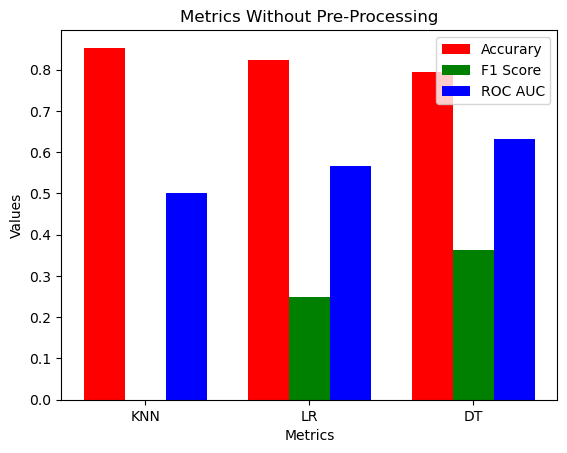

In [14]:
#draw charts with metrics, raw data
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = [knn_acc_raw, lr_acc_raw, dt_acc_raw]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [knn_f1_raw, lr_f1_raw, dt_f1_raw]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [knn_roc_raw, lr_roc_raw, dt_roc_raw]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title("Metrics Without Pre-Processing")
  
plt.xticks(ind+width,['KNN', 'LR', 'DT'])
plt.legend( (bar1, bar2, bar3), ('Accurary', 'F1 Score', 'ROC AUC') )
plt.show()

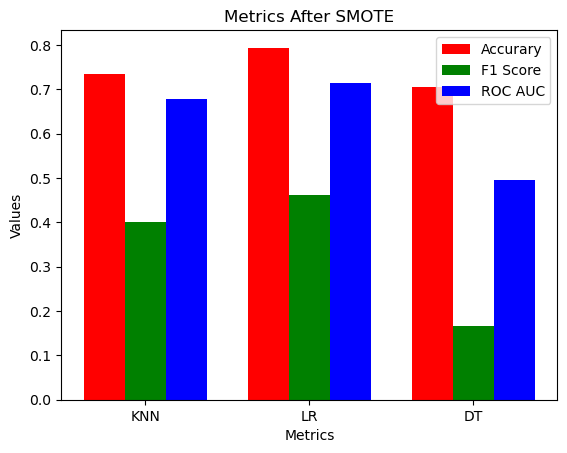

In [15]:
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = [knn_acc_smote, lr_acc_smote, dt_acc_smote]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [knn_f1_smote, lr_f1_smote, dt_f1_smote]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [knn_roc_smote, lr_roc_smote, dt_roc_smote]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title("Metrics After SMOTE")
  
plt.xticks(ind+width,['KNN', 'LR', 'DT'])
plt.legend( (bar1, bar2, bar3), ('Accurary', 'F1 Score', 'ROC AUC') )
plt.show()

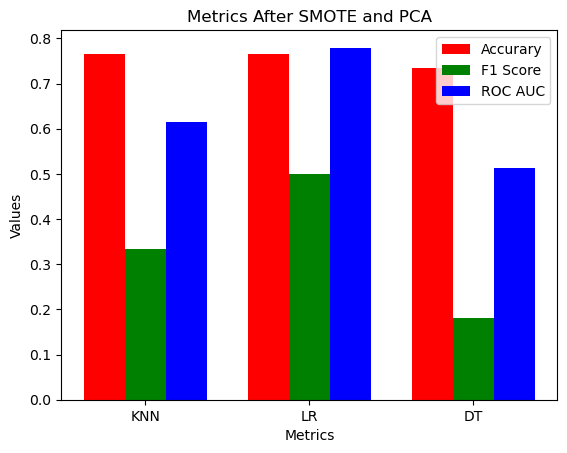

In [16]:
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = [knn_acc_smote_pca, lr_acc_smote_pca, dt_acc_smote_pca]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [knn_f1_smote_pca, lr_f1_smote_pca, dt_f1_smote_pca]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [knn_roc_smote_pca, lr_roc_smote_pca, dt_roc_smote_pca]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title("Metrics After SMOTE and PCA")
  
plt.xticks(ind+width,['KNN', 'LR', 'DT'])
plt.legend( (bar1, bar2, bar3), ('Accurary', 'F1 Score', 'ROC AUC') )
plt.show()

In [17]:
#testing performing smote before PCA
training_x_smote, training_y_smote = oversample.fit_resample(training_x, training_y)
pca = PCA(n_components=5)
training_x_smote_pca = pca.fit_transform(training_x_smote)
testing_x_pca = pca.transform(testing_x)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.53269619 0.15998769 0.06655798 0.05930242 0.03802557]


In [18]:
#knn model after smote then PCA
k = 4
knnMdl = KNeighborsClassifier(n_neighbors=k).fit(training_x_pca_smote, training_y_smote)
knnScores = cross_val_score(knnMdl, training_x_smote_pca, training_y_smote, cv=10, scoring='accuracy')
print("KNN average accuracy on 10-fold cross validation: " + str(np.mean(knnScores)))
knnPredictions = knnMdl.predict(testing_x_pca)
print(knnPredictions)
print("KNN accuracy on  test data:", accuracy_score(testing_y, knnPredictions))

KNN average accuracy on 10-fold cross validation: 0.7899209486166008
[0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
KNN accuracy on  test data: 0.7352941176470589


no change in results